# <center>Assessment CLO-3: Tugas Pemrograman Learning</center>

<b>Topik</b>
[Klasifikasi pada dataset LandMines Untuk Mendeteksi jenis jenis ranjau] pada menggunakan [KNN, Naive Bayes, dan Decision Tree]

<b>Kelompok: </b>

Anggota:
1. Argiansyah Galih Permata - 1301223397
2. Mohammad Alvinanda Kurniawan - 1301223004
3. Zhifa Febriza Azfar - 1301223

#### Pendahuluan
Dataset "Land Mines" yang dipilih ini adalah dataset yang berasal dari UCI Machine Learning Repository. Dataset ini digunakan dalam konteks deteksi ranjau darat berdasarkan parameter sensor. Dataset ini berisi beberapa fitur yang berkaitan dengan nilai output sensor dan jenis ranjau yang terdeteksi. Tujuan dari penggunaan dataset ini adalah untuk melakukan klasifikasi jenis ranjau menggunakan teknik machine learning, dalam hal ini,kami menggunakan tiga metode yaitu:

**Naïve Bayes**

Deskripsi: Naïve Bayes adalah algoritma klasifikasi berbasis probabilistik yang menggunakan Teorema Bayes dengan asumsi independensi antar fitur. Metode ini sederhana dan cepat, namun efektif untuk berbagai tugas klasifikasi.
Penerapan: Algoritma ini diterapkan pada dataset "Land Mines" untuk mengklasifikasikan jenis ranjau berdasarkan nilai sensor.

**K-Nearest Neighbors (KNN) dengan Metrik Manhattan**

Deskripsi: KNN adalah algoritma non-parametrik yang digunakan untuk klasifikasi dan regresi. Dalam metode ini, sebuah data diklasifikasikan berdasarkan kedekatan dengan tetangganya. Metrik Manhattan digunakan untuk mengukur jarak antar data.
Penerapan: KNN diterapkan pada dataset "Land Mines" untuk mengklasifikasikan jenis ranjau berdasarkan nilai sensor dengan menggunakan metrik Manhattan untuk menghitung jarak antar titik data.

**Decision Tree**

Deskripsi: Decision Tree adalah algoritma pembelajaran mesin yang menggunakan struktur pohon untuk membuat keputusan berdasarkan fitur data. Algoritma ini membagi data ke dalam subset yang lebih kecil dan lebih homogen berdasarkan fitur yang paling signifikan.
Penerapan: Decision Tree diterapkan pada dataset "Land Mines" untuk mengklasifikasikan jenis ranjau berdasarkan nilai sensor. Algoritma ini membantu dalam memahami keputusan klasifikasi dengan representasi visual yang mudah diinterpretasikan.

In [ ]:
pip install ucimlrepo

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier

# **Import Dataset**

In [ ]:
# Import Dataset
dataset = pd.read_excel('/content/Mine_Dataset.xls', sheet_name=1)



# **Menampilkan beberapa baris pertama dari dataset**

In [ ]:
# Menampilkan beberapa baris pertama dari dataset
print(dataset.head())


          V         H    S  M
0  0.338157  0.000000  0.0  1
1  0.320241  0.181818  0.0  1
2  0.287009  0.272727  0.0  1
3  0.256284  0.454545  0.0  1
4  0.262840  0.545455  0.0  1


# **Memeriksa Nilai yang Hilang**

In [ ]:
# Memeriksa nilai yang hilang
print("\nMissing Values:")
print(dataset.isnull().sum())



Missing Values:
V    0
H    0
S    0
M    0
dtype: int64


# **Mengeksplorasi Data**

In [ ]:
from ucimlrepo import fetch_ucirepo
dataset = fetch_ucirepo(id=763)

# Convert to pandas DataFrame
fitur = dataset.data.features
target = dataset.data.targets

In [ ]:
fitur

,V,H,S
0,0.338157,0.000000,0.0
1,0.320241,0.181818,0.0
2,0.287009,0.272727,0.0
3,0.256284,0.454545,0.0
4,0.262840,0.545455,0.0
...,...,...,...
333,0.323262,0.909091,0.4
334,0.444108,0.181818,1.0
335,0.353474,0.454545,1.0
336,0.362537,0.727273,1.0


In [ ]:
target

,M
0,1
1,1
2,1
3,1
4,1
...,...
333,5
334,5
335,5
336,5


In [ ]:
dataset = pd.concat([fitur, target], axis=1)

In [ ]:
dataset

,V,H,S,M
0,0.338157,0.000000,0.0,1
1,0.320241,0.181818,0.0,1
2,0.287009,0.272727,0.0,1
3,0.256284,0.454545,0.0,1
4,0.262840,0.545455,0.0,1
...,...,...,...,...
333,0.323262,0.909091,0.4,5
334,0.444108,0.181818,1.0,5
335,0.353474,0.454545,1.0,5
336,0.362537,0.727273,1.0,5


# **Mengecek Outlier**

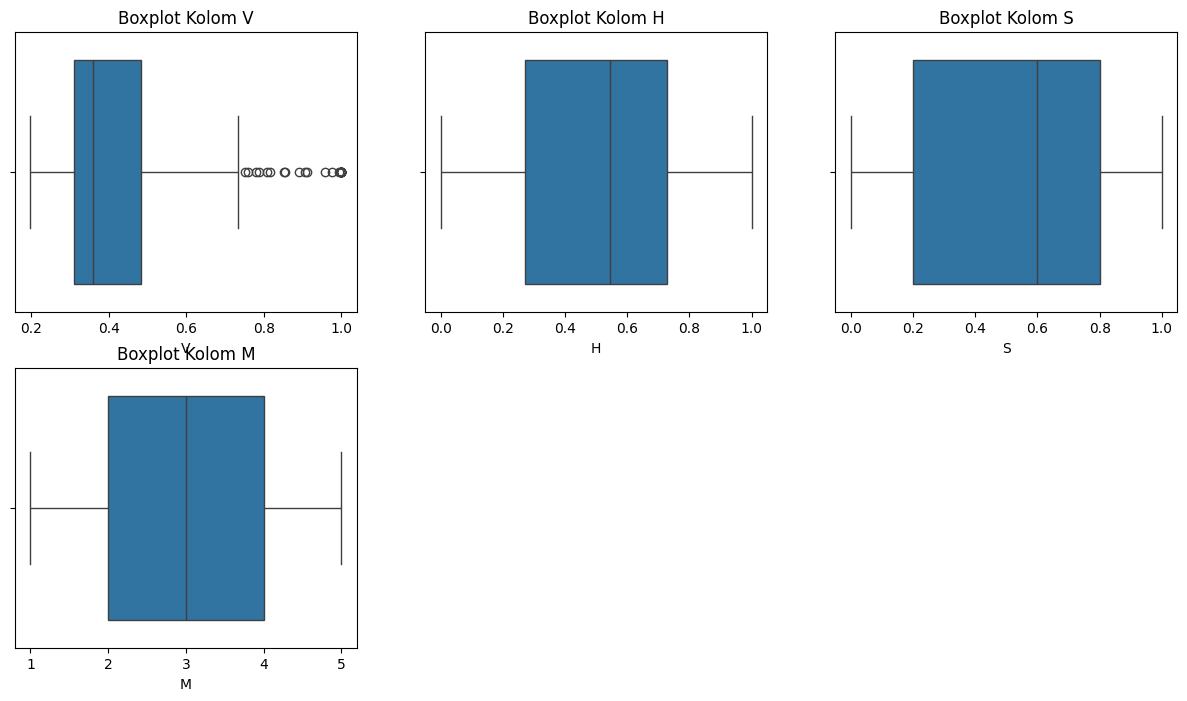

In [ ]:
# Mengecek Outlier
# Menampilkan plot sebelum penanganan outliers
num_cols = len(dataset.select_dtypes(include=['int', 'float']).columns)
plt.figure(figsize=(15, 8))
rows = (num_cols + 2) // 3
for i, col in enumerate(dataset.select_dtypes(include=['int', 'float']).columns):
    plt.subplot(rows, 3, i + 1)
    sns.boxplot(x=dataset[col])
    plt.title(f'Boxplot Kolom {col}')
plt.show()


In [ ]:
# Menampilkan jumlah data sebelum penanganan outliers
initial_count = dataset.shape[0]
print(f'Jumlah data sebelum penanganan outliers: {initial_count}')

Jumlah data sebelum penanganan outliers: 338


# **Menangani Outliers**

In [ ]:
# Mengatasi outliers menggunakan IQR
Q1 = dataset.iloc[:, :-1].quantile(0.25)
Q3 = dataset.iloc[:, :-1].quantile(0.75)
IQR = Q3 - Q1

# Menghapus outliers
filtered_dataset = dataset[~((dataset.iloc[:, :-1] < (Q1 - 1.5 * IQR)) | (dataset.iloc[:, :-1] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Menghitung jumlah data setelah penanganan outliers
final_count = filtered_dataset.shape[0]
outliers_removed = initial_count - final_count
print(f'Jumlah data setelah penanganan outliers: {final_count}')
print(f'Jumlah outliers yang dihapus: {outliers_removed}')

Jumlah data setelah penanganan outliers: 306
Jumlah outliers yang dihapus: 32


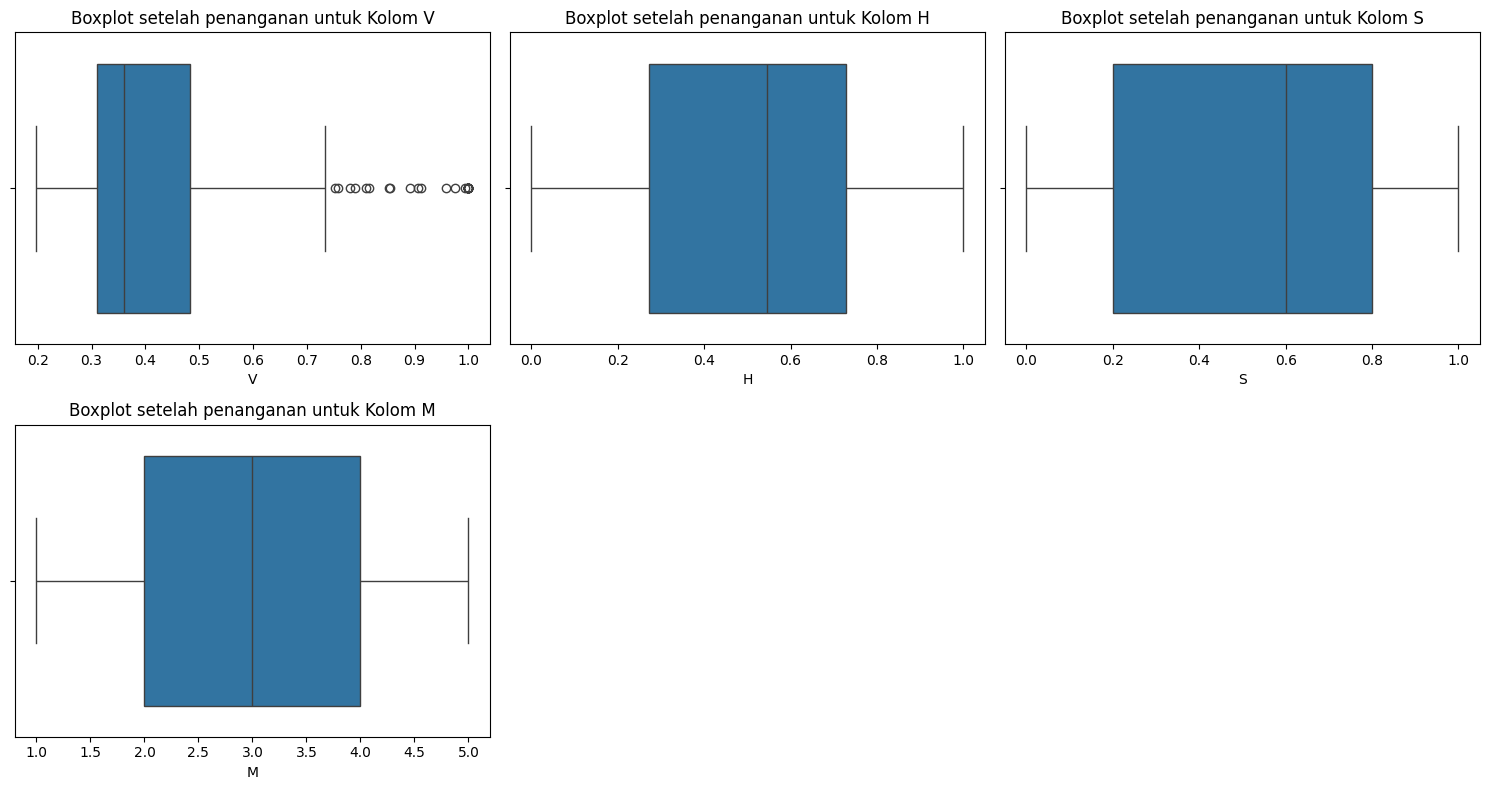

In [ ]:
# Mengecek Outliers setelah penanganan
plt.figure(figsize=(15, 8))
for i, col in enumerate(dataset.select_dtypes(include=['int', 'float']).columns):
    plt.subplot(rows, 3, i+1)
    sns.boxplot(x=dataset[col])
    plt.title(f'Boxplot setelah penanganan untuk Kolom {col}')
plt.tight_layout()
plt.show()

# **Splitting Data**

In [ ]:
# Define features and target
X = fitur
Y = target


In [ ]:
# Split the dataset into training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# Display the size of each set
print("\nSize of X_train:", X_train.shape)
print("Size of X_test:", X_test.shape)
print("Size of Y_train:", Y_train.shape)
print("Size of Y_test:", Y_test.shape)

# Display first few rows of X_train and Y_train to ensure they are separated correctly
print("\nHead of X_train:")
print(pd.DataFrame(X_train).head())

print("\nHead of Y_train:")
print(pd.DataFrame(Y_train).head())

print("\nHead of X_test:")
print(pd.DataFrame(X_test).head())

print("\nHead of Y_test:")
print(pd.DataFrame(Y_test).head())



Size of X_train: (253, 3)
Size of X_test: (85, 3)
Size of Y_train: (253, 1)
Size of Y_test: (85, 1)

Head of X_train:
            V         H    S
245  0.290030  0.090909  1.0
244  0.302114  0.909091  0.4
181  0.329305  1.000000  1.0
168  0.240332  0.181818  0.4
124  0.664652  0.181818  0.4

Head of Y_train:
     M
245  1
244  1
181  4
168  4
124  3

Head of X_test:
            V         H    S
110  0.389728  0.181818  0.2
333  0.323262  0.909091  0.4
185  0.335347  0.454545  0.0
76   0.468277  0.818182  0.8
211  0.471299  0.181818  0.4

Head of Y_test:
     M
110  3
333  5
185  5
76   2
211  5


# **Transformasi Data**

In [ ]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)


# **Model Training dan Evaluation Menggunakan Metode Gaussian Naive Bayes**

In [ ]:
# Fit the models
gnb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
gnb.fit(X_train_normalized, Y_train.values.ravel())
knn.fit(X_train_normalized, Y_train.values.ravel())
dt.fit(X_train_normalized, Y_train.values.ravel())

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [ ]:
# Initialize and train the Gaussian Naïve Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train_normalized, Y_train.values.ravel())

# Make predictions on the test set
Y_pred_gnb = gnb.predict(X_test_normalized)

# Make predictions on the training set
Y_train_pred_gnb = gnb.predict(X_train_normalized)

# Evaluate the model's performance on the test set
accuracy_test_gnb = accuracy_score(Y_test, Y_pred_gnb)
print("Naïve Bayes Accuracy (Test):", accuracy_test_gnb)
print("\nClassification Report (Test):\n", classification_report(Y_test, Y_pred_gnb))

# Evaluate the model's performance on the training set
accuracy_train_gnb = accuracy_score(Y_train, Y_train_pred_gnb)
print("Naïve Bayes Accuracy (Train):", accuracy_train_gnb)
print("\nClassification Report (Train):\n", classification_report(Y_train, Y_train_pred_gnb))


Naïve Bayes Accuracy (Test): 0.4470588235294118

Classification Report (Test):
               precision    recall  f1-score   support

           1       0.52      0.94      0.67        16
           2       0.60      0.75      0.67        16
           3       0.20      0.19      0.19        16
           4       0.12      0.07      0.09        15
           5       0.54      0.32      0.40        22

    accuracy                           0.45        85
   macro avg       0.40      0.45      0.40        85
weighted avg       0.41      0.45      0.41        85

Naïve Bayes Accuracy (Train): 0.48616600790513836

Classification Report (Train):
               precision    recall  f1-score   support

           1       0.52      0.93      0.66        55
           2       0.82      0.67      0.73        54
           3       0.24      0.22      0.23        50
           4       0.52      0.25      0.34        51
           5       0.31      0.28      0.29        43

    accuracy          

# **Model Training dan Evaluation menggunakan Metode KNN Matriks Manhattan**

In [ ]:
# Initialize and train the KNN classifier with Manhattan distance
knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn.fit(X_train_normalized, Y_train.values.ravel())

# Make predictions on the test set
Y_pred_knn = knn.predict(X_test_normalized)

# Make predictions on the training set
Y_train_pred_knn = knn.predict(X_train_normalized)

# Evaluate the model's performance on the test set
accuracy_test_knn = accuracy_score(Y_test, Y_pred_knn)
print("KNN Accuracy (Test):", accuracy_test_knn)
print("\nClassification Report (Test):\n", classification_report(Y_test, Y_pred_knn))

# Evaluate the model's performance on the training set
accuracy_train_knn = accuracy_score(Y_train, Y_train_pred_knn)
print("KNN Accuracy (Train):", accuracy_train_knn)
print("\nClassification Report (Train):\n", classification_report(Y_train, Y_train_pred_knn))


KNN Accuracy (Test): 0.4470588235294118

Classification Report (Test):
               precision    recall  f1-score   support

           1       0.52      0.75      0.62        16
           2       0.78      0.88      0.82        16
           3       0.26      0.44      0.33        16
           4       0.27      0.20      0.23        15
           5       0.33      0.09      0.14        22

    accuracy                           0.45        85
   macro avg       0.43      0.47      0.43        85
weighted avg       0.43      0.45      0.41        85

KNN Accuracy (Train): 0.6719367588932806

Classification Report (Train):
               precision    recall  f1-score   support

           1       0.71      0.98      0.82        55
           2       0.88      0.98      0.93        54
           3       0.47      0.62      0.53        50
           4       0.68      0.41      0.51        51
           5       0.55      0.26      0.35        43

    accuracy                           

# **Model Training dan Evaluation menggunakan Metode Decision Tree**

In [ ]:
# Initialize and train the Decision Tree classifier
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
dt.fit(X_train_normalized, Y_train.values.ravel())

# Make predictions on the test set
Y_pred_dt = dt.predict(X_test_normalized)

# Make predictions on the training set
Y_train_pred_dt = dt.predict(X_train_normalized)

# Evaluate the model's performance on the test set
accuracy_test_dt = accuracy_score(Y_test, Y_pred_dt)
print("Decision Tree Accuracy (Test):", accuracy_test_dt)
print("\nClassification Report (Test):\n", classification_report(Y_test, Y_pred_dt))

# Evaluate the model's performance on the training set
accuracy_train_dt = accuracy_score(Y_train, Y_train_pred_dt)
print("Decision Tree Accuracy (Train):", accuracy_train_dt)
print("\nClassification Report (Train):\n", classification_report(Y_train, Y_train_pred_dt))


Decision Tree Accuracy (Test): 0.49411764705882355

Classification Report (Test):
               precision    recall  f1-score   support

           1       0.48      0.75      0.59        16
           2       1.00      0.94      0.97        16
           3       0.33      0.50      0.40        16
           4       0.37      0.47      0.41        15
           5       0.00      0.00      0.00        22

    accuracy                           0.49        85
   macro avg       0.44      0.53      0.47        85
weighted avg       0.41      0.49      0.44        85

Decision Tree Accuracy (Train): 0.6758893280632411

Classification Report (Train):
               precision    recall  f1-score   support

           1       0.60      0.89      0.72        55
           2       0.96      0.87      0.91        54
           3       0.56      0.70      0.62        50
           4       0.64      0.63      0.63        51
           5       0.73      0.19      0.30        43

    accuracy      

# ** Hasil dan Analisis**



Test Set Results:
           Model  Accuracy  Precision    Recall  F1 Score
0    Naïve Bayes  0.447059   0.409377  0.447059  0.406288
1            KNN  0.447059   0.427820  0.447059  0.409839
2  Decision Tree  0.494118   0.406349  0.494118  0.440308

Training Set Results:
           Model  Accuracy  Precision    Recall  F1 Score
0    Naïve Bayes  0.486166   0.490998  0.486166  0.464795
1            KNN  0.671937   0.665858  0.671937  0.645913
2  Decision Tree  0.675889   0.700419  0.675889  0.653049


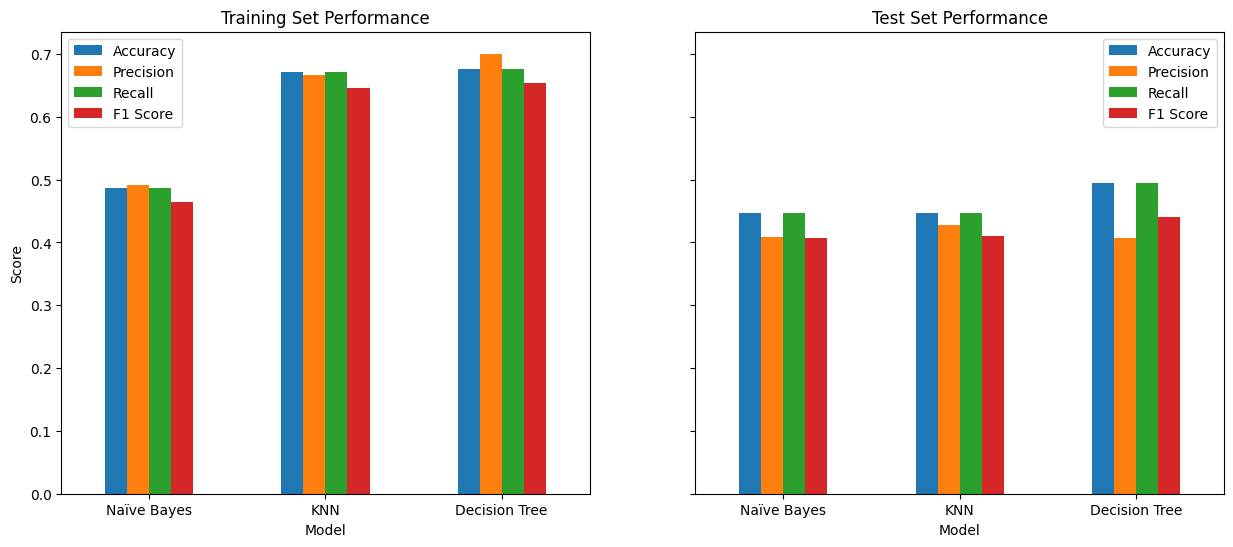

In [ ]:
# Create DataFrames for the results
results_test = pd.DataFrame({
    'Model': ['Naïve Bayes', 'KNN', 'Decision Tree'],
    'Accuracy': [accuracy_test_gnb, accuracy_test_knn, accuracy_test_dt],
    'Precision': [precision_score(Y_test, Y_pred_gnb, average='weighted'),
                  precision_score(Y_test, Y_pred_knn, average='weighted'),
                  precision_score(Y_test, Y_pred_dt, average='weighted')],
    'Recall': [recall_score(Y_test, Y_pred_gnb, average='weighted'),
               recall_score(Y_test, Y_pred_knn, average='weighted'),
               recall_score(Y_test, Y_pred_dt, average='weighted')],
    'F1 Score': [f1_score(Y_test, Y_pred_gnb, average='weighted'),
                 f1_score(Y_test, Y_pred_knn, average='weighted'),
                 f1_score(Y_test, Y_pred_dt, average='weighted')]
})

results_train = pd.DataFrame({
    'Model': ['Naïve Bayes', 'KNN', 'Decision Tree'],
    'Accuracy': [accuracy_train_gnb, accuracy_train_knn, accuracy_train_dt],
    'Precision': [precision_score(Y_train, Y_train_pred_gnb, average='weighted'),
                  precision_score(Y_train, Y_train_pred_knn, average='weighted'),
                  precision_score(Y_train, Y_train_pred_dt, average='weighted')],
    'Recall': [recall_score(Y_train, Y_train_pred_gnb, average='weighted'),
               recall_score(Y_train, Y_train_pred_knn, average='weighted'),
               recall_score(Y_train, Y_train_pred_dt, average='weighted')],
    'F1 Score': [f1_score(Y_train, Y_train_pred_gnb, average='weighted'),
                 f1_score(Y_train, Y_train_pred_knn, average='weighted'),
                 f1_score(Y_train, Y_train_pred_dt, average='weighted')]
})

print("Test Set Results:")
print(results_test)
print("\nTraining Set Results:")
print(results_train)

# Plot the results
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

results_train.set_index('Model').plot(kind='bar', ax=axes[0], title='Training Set Performance')
results_test.set_index('Model').plot(kind='bar', ax=axes[1], title='Test Set Performance')

for ax in axes:
    ax.set_ylabel('Score')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.show()


Kami melakukan model training menggunakan tiga metode yaitu Naive Bayes, KNN  dan Decision Tree, lalu kami mendapatkan bahwa akurasi data training Selalu Kurang dari 0.7, dan akurasi data tes selalu kurang dari 0,5. Kami mendapati bahwa dari ketiga metode machine learning yang kami lakukan yang memiliki akurasi paling tinggi adalah metode Decision Tree denggan akurasi test mencapai 0,49 dan akurasi training mencapai 0,67. Kami juga telah mencoba berbagai cara untuk mengurangi atau menghilangkan outliers, namun data hanya semakin menurun dan metode penanganan yang memberikan akurasi terbaik adalah IQR, meskipun masih terdapat banyak outliers yang tersisa

Dari hasil di atas:

Naïve Bayes memiliki akurasi dan F1-Score yang paling rendah pada data testing. Model ini mungkin tidak mampu menangani kompleksitas atau fitur non-linear dalam dataset dengan baik.

KNN memiliki presisi yang sedikit lebih baik daripada Naïve Bayes, tetapi tetap menunjukkan kinerja yang rendah pada data testing.

Decision Tree memberikan performa terbaik dalam hal akurasi dan F1-Score pada data testing, menunjukkan kemampuan untuk menangkap pola yang lebih kompleks dalam dataset meskipun masih menunjukkan overfitting yang ditunjukkan oleh perbedaan yang besar antara akurasi training dan testing.

 maka dapat disimpulkan bahwa dataset ini mungkin memiliki :

*Ketidakseimbangan Kelas:* Jika dataset tidak seimbang, model akan kesulitan mempelajari kelas minoritas, sehingga akurasi bisa rendah.

*Fitur yang Tidak Relevan atau Kurang Informasi:* Fitur yang digunakan mungkin tidak cukup informatif untuk membedakan antara kelas-kelas yang berbeda.

*Overfitting:* Model mungkin terlalu fit dengan data training dan tidak generalisasi dengan baik pada data testing.

*Outliers*: Meskipun sudah dihapus, mungkin masih ada beberapa outliers yang mempengaruhi kinerja model.

*Kompleksitas Data:* Dataset mungkin memiliki kompleksitas yang tinggi, sehingga model sederhana seperti yang digunakan tidak cukup untuk menangkap pola dalam data.



# **Kesimpulan:**

Dari hasil evaluasi, kita melihat bahwa semua model memiliki akurasi yang kurang dari 0.7 pada data training, sementara untuk data test mwmiliki akurasi dibawah 0.5. Meskipun sudah mencoba beberapa metode, performa masih kurang memuaskan. Mungkin kami perlu melakukan lebih banyak eksplorasi fitur atau menggunakan model yang lebih kompleks.

# **Jawab Pertanyaan**

In [ ]:
# Menampilkan jumlah data sebelum penanganan outliers
initial_count = dataset.shape[0]
print(f'Jumlah data sebelum penanganan outliers: {initial_count}')

Jumlah data sebelum penanganan outliers: 338


In [ ]:
print(f'Jumlah data setelah penanganan outliers: {final_count}')
print(f'Jumlah outliers yang dihapus: {outliers_removed}')

Jumlah data setelah penanganan outliers: 306
Jumlah outliers yang dihapus: 32


In [ ]:
# Hitung koefisien korelasi antara fitur dan target
correlations = X_filtered.apply(lambda x: x.corr(Y_filtered))

# Tampilkan hasil koefisien korelasi
print("Koefisien Korelasi antara Fitur dan Variabel Target (M):")
print(correlations)

Koefisien Korelasi antara Fitur dan Variabel Target (M):
V   -0.144569
H    0.041326
S    0.017346
dtype: float64


In [ ]:
mean_values = X_filtered.mean()
std_values = X_filtered.std()
is_minmax_normalized = all((X_filtered.min() >= 0) & (X_filtered.max() <= 1))
print(f'Apakah data dinormalisasi dengan MinMaxScaler: {"Ya" if is_minmax_normalized else "Tidak"}')


Apakah data dinormalisasi dengan MinMaxScaler: Ya


In [ ]:
# 5. Rentang data tiap fitur:
data_ranges = X_filtered.agg(['min', 'max'])
print("\nRentang Data untuk Setiap Fitur:")
print(data_ranges)



Rentang Data untuk Setiap Fitur:
            V    H    S
min  0.197734  0.0  0.0
max  0.999999  1.0  1.0
